In [4]:
# Part 2: Classification
## Gradient Descent
## Problem 1

import pandas as pd
import numpy as np
import math
from decimal import *

getcontext().prec = 6
Decimal(1) / Decimal(7)


np.set_printoptions(precision=4)
np.set_printoptions(suppress=True)

gap_data = './datasets/08_gap-every-five-years.tsv'
df = pd.read_csv(gap_data, sep='\t', dtype={'country':str, 'continent':str, 'year':np.uint16, 'lifeExp':np.float64 , 'pop':np.uint64, 'gdpPercap':np.float64})

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   continent  1704 non-null   object 
 2   year       1704 non-null   uint16 
 3   lifeExp    1704 non-null   float64
 4   pop        1704 non-null   uint64 
 5   gdpPercap  1704 non-null   float64
dtypes: float64(2), object(2), uint16(1), uint64(1)
memory usage: 70.0+ KB


In [5]:
def log_reg_gradient_descent(X, y, T, a):
    # Initialize vars
    # m, n - samples, features respectively
    m, n = X.shape
    weights = np.zeros(n)
    bias = 0
    dw, db = [100], [100]

    ### BEGIN EPOCH LOOP
    epoch = 0
    while (epoch < T ):
        epoch += 1
        
        if(np.any(np.linalg.norm([dw, db]) < a)):
            break
        # Initialize linear combination approximation
        approximation = np.dot(X, weights) + bias
     
        # Apply log-odds
        prediction = 1 / (1 + np.exp(-approximation))
        
        # Compute losses
        dw = np.dot(X.T, (prediction - y)) / m
        db = np.sum(prediction - y) / m
       
        # Update theta components
        weights -= a * dw
        bias -= a * db
        if(epoch % 1000 == 0):
            #print(np.sum(prediction - y))
            print("\n\nEpoch: ", epoch, "\n", weights, bias)
    ### END EPOCH LOOP
    return weights, bias

def predict(X, weights, bias):
    linear_model = np.dot(X, weights) + bias
    y_predicted = 1 / (1 + np.exp(-linear_model))
    y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
    return np.array(linear_model)

In [6]:
from sklearn.model_selection import train_test_split

# X: dataset, y: hypothesis function, T: epochs, alpha: step size
X = df[['year', 'pop', 'gdpPercap']] #X = df[['year', 'pop', 'gdpPercap']]
y = df['lifeExp']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666)
#train, test = train_test_split(df.dropna(), test_size=0.2)
#X_train, y_train = train[['year', 'pop', 'gdpPercap']].to_numpy(), train['lifeExp'].to_numpy()
#X_test, y_test = test[['year', 'pop', 'gdpPercap']].to_numpy(), test['lifeExp'].to_numpy()

weights, bias = log_reg_gradient_descent(X_train, y_train, 100000, .01)

arr = predict(X_test, weights, bias)
arr
#arr.T.dot(y_test)
#arr



Epoch:  1000 
 [1.1621e+06 1.8279e+10 5.1453e+06] 586.5047889948544


Epoch:  2000 
 [2.3241e+06 3.6558e+10 1.0291e+07] 1173.004577989697


Epoch:  3000 
 [3.4861e+06 5.4837e+10 1.5436e+07] 1759.5043669845397


Epoch:  4000 
 [4.6482e+06 7.3116e+10 2.0581e+07] 2346.0041559793826


Epoch:  5000 
 [5.8102e+06 9.1396e+10 2.5726e+07] 2932.5039449742253


Epoch:  6000 
 [6.9723e+06 1.0967e+11 3.0872e+07] 3519.003733969068


Epoch:  7000 
 [8.1343e+06 1.2795e+11 3.6017e+07] 4105.503522963911


Epoch:  8000 
 [9.2963e+06 1.4623e+11 4.1162e+07] 4692.003311958753


Epoch:  9000 
 [1.0458e+07 1.6451e+11 4.6307e+07] 5278.503100953596


Epoch:  10000 
 [1.1620e+07 1.8279e+11 5.1453e+07] 5865.002889948439


Epoch:  11000 
 [1.2782e+07 2.0107e+11 5.6598e+07] 6451.502678943281


Epoch:  12000 
 [1.3945e+07 2.1935e+11 6.1743e+07] 7038.002467938124


Epoch:  13000 
 [1.5107e+07 2.3763e+11 6.6888e+07] 7624.502256932967


Epoch:  14000 
 [1.6269e+07 2.5591e+11 7.2034e+07] 8211.00204592781


Epoch:  150

array([4.2189e+17, 1.7468e+19, 4.4748e+18, 1.7591e+18, 2.0944e+19,
       1.0775e+19, 3.0914e+18, 1.0942e+20, 2.1538e+19, 3.1354e+19,
       8.6104e+18, 9.1312e+18, 1.7390e+19, 2.7737e+19, 1.5508e+18,
       2.0660e+18, 3.6267e+18, 1.5320e+19, 5.6425e+18, 1.5519e+19,
       1.8147e+19, 1.3095e+20, 1.9197e+19, 2.9717e+19, 1.7754e+19,
       8.5327e+19, 1.9210e+18, 5.5440e+19, 4.9033e+18, 6.0047e+19,
       3.2258e+19, 9.4850e+19, 2.3619e+19, 4.7288e+19, 6.5694e+18,
       1.1683e+19, 2.4797e+20, 1.4382e+19, 5.7372e+19, 4.6696e+18,
       5.2651e+17, 9.2181e+19, 3.8206e+18, 3.1437e+20, 3.9535e+19,
       2.0256e+17, 8.6513e+19, 9.9575e+18, 1.2155e+19, 9.8891e+18,
       1.2946e+19, 2.1636e+18, 1.2361e+19, 6.3083e+18, 5.8688e+18,
       1.2127e+19, 1.0619e+19, 2.6627e+18, 1.2170e+21, 2.2485e+21,
       2.2222e+18, 6.8719e+18, 1.3792e+21, 1.5812e+19, 5.8314e+19,
       3.7222e+18, 2.9228e+19, 1.8627e+19, 6.3903e+18, 7.8733e+19,
       1.6433e+17, 1.1480e+20, 2.9232e+18, 6.3729e+17, 2.5807e

In [7]:
print(weights, bias)

[1.1620e+08 1.8279e+12 5.1453e+08] 58649.98389948428


In [8]:
def hypothesis(x, theta):
    h = np.dot(np.transpose(theta), x)
    return (1 / (1 + np.exp(-h)))

def gradient_descent(X, y, T, alpha):
    m, n = X.shape # m = #examples, n = #features
    print(n, ' ', m)
    theta_h = np.zeros((T, n)) # initialize parameters
    f = np.zeros((T, n)) # track loss over time

    for epoch in range(T - 1):
        gradient = np.zeros(n)
        theta = theta_h[epoch]
       
        for i in range(n):
            for j in range(m):
                gradient[i] += (hypothesis(X[j], theta) + y[i]) * X[j][i]
            #gradient[i] = gradient[i]/m
            #print(gradient)
            #print((hypothesis(X[i], theta) - y[i]), '<---')

        f[epoch, i] =  np.linalg.norm(0.5*(X[i].dot(theta) + y[i])**2, 1)
        if(epoch % 100 == 0):
            print(f[epoch])
        #print(theta_h[epoch + 1] - alpha*gradient)

        gradient = gradient / m
        #print(gradient)
        theta_h[epoch + 1] -= alpha*gradient
        
    return theta_h, f



In [9]:
#a, b = gradient_descent(X, y, 10000, 100000)
#print(X.shape)
#print(a[1::999])
#print(b)
#print(X[:100,:3])

In [10]:
#print(X[::1])

In [11]:
#import seaborn as sns
#import matplotlib.pyplot as plt
#sns.set_theme(color_codes=True)

#sns.jointplot(x="gdpPercap", y="lifeExp", data=tips, kind="reg");


#gdp_perCap = df[['gdpPercap']]
#reg_fitted = pd.DataFrame(data=gdp_perCap, columns=['gdpPercap'])
#a.show()
#sns.lmplot(x='year', y="lifeExp", data=reg_fitted, logistic=True, y_jitter=.03)

In [12]:
#plt.scatter(x=data_df['X'], y=data_df['y'])
#plt.xlabel('X'); plt.ylabel('y');
#plt.title('Input dataset');

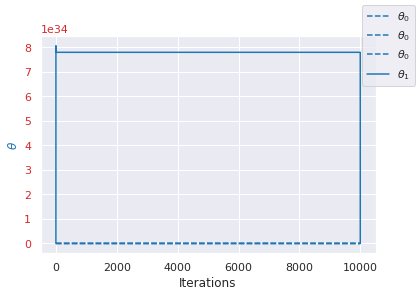